In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [247]:
df = pd.read_csv('\\Users\Delll\Downloads\housing_price_dataset.csv.zip')

In [248]:
df.head

<bound method NDFrame.head of        SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[50000 rows x 6 columns]>

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [250]:
train_feature = df.columns.tolist()
train_feature

['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt', 'Price']

In [251]:
df[train_feature].describe().T\
    .style.bar(subset=['mean'], color=px.colors.qualitative.G10[0])\
    .background_gradient(subset=['std'], cmap='BuPu')\
    .background_gradient(subset=['50%'], cmap='Reds')


,count,mean,std,min,25%,50%,75%,max
SquareFeet,50000.000000,2006.374680,575.513241,1000.000000,1513.000000,2007.000000,2506.000000,2999.000000
Bedrooms,50000.000000,3.498700,1.116326,2.000000,3.000000,3.000000,4.000000,5.000000
Bathrooms,50000.000000,1.995420,0.815851,1.000000,1.000000,2.000000,3.000000,3.000000
YearBuilt,50000.000000,1985.404420,20.719377,1950.000000,1967.000000,1985.000000,2003.000000,2021.000000
Price,50000.000000,224827.325151,76141.842966,-36588.165397,169955.860225,225052.141166,279373.630052,492195.259972


In [252]:
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [253]:
df.isna().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [254]:
def data_profiling(df):
    data_profile = []
    columns = df.columns 
    for col in columns:
        dtype = df[col].dtypes
        nunique = df[col].nunique()
        null = df[col].isnull().sum()
        duplicates = df[col].duplicated().sum()
        data_profile.append([col,dtype,nunique,null,duplicates])
    data_profile_finding = pd.DataFrame(data_profile)
    data_profile_finding.columns = ['column', 'dtype', 'nunique', 'null', 'duplicates']
    return data_profile_finding
        

In [255]:
data_profiling(df)

,column,dtype,nunique,null,duplicates
0,SquareFeet,int64,2000,0,48000
1,Bedrooms,int64,4,0,49996
2,Bathrooms,int64,3,0,49997
3,Neighborhood,object,3,0,49997
4,YearBuilt,int64,72,0,49928
5,Price,float64,50000,0,0


In [256]:
df.duplicated().sum()

0

In [257]:
numeric_features = [i for i in df.columns if df[i].dtype != '0']
categorical_features = [i for i in df.columns if df[i].dtype =='0']

In [258]:
print(len(numeric_features))
print(len(categorical_features))

6
0


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

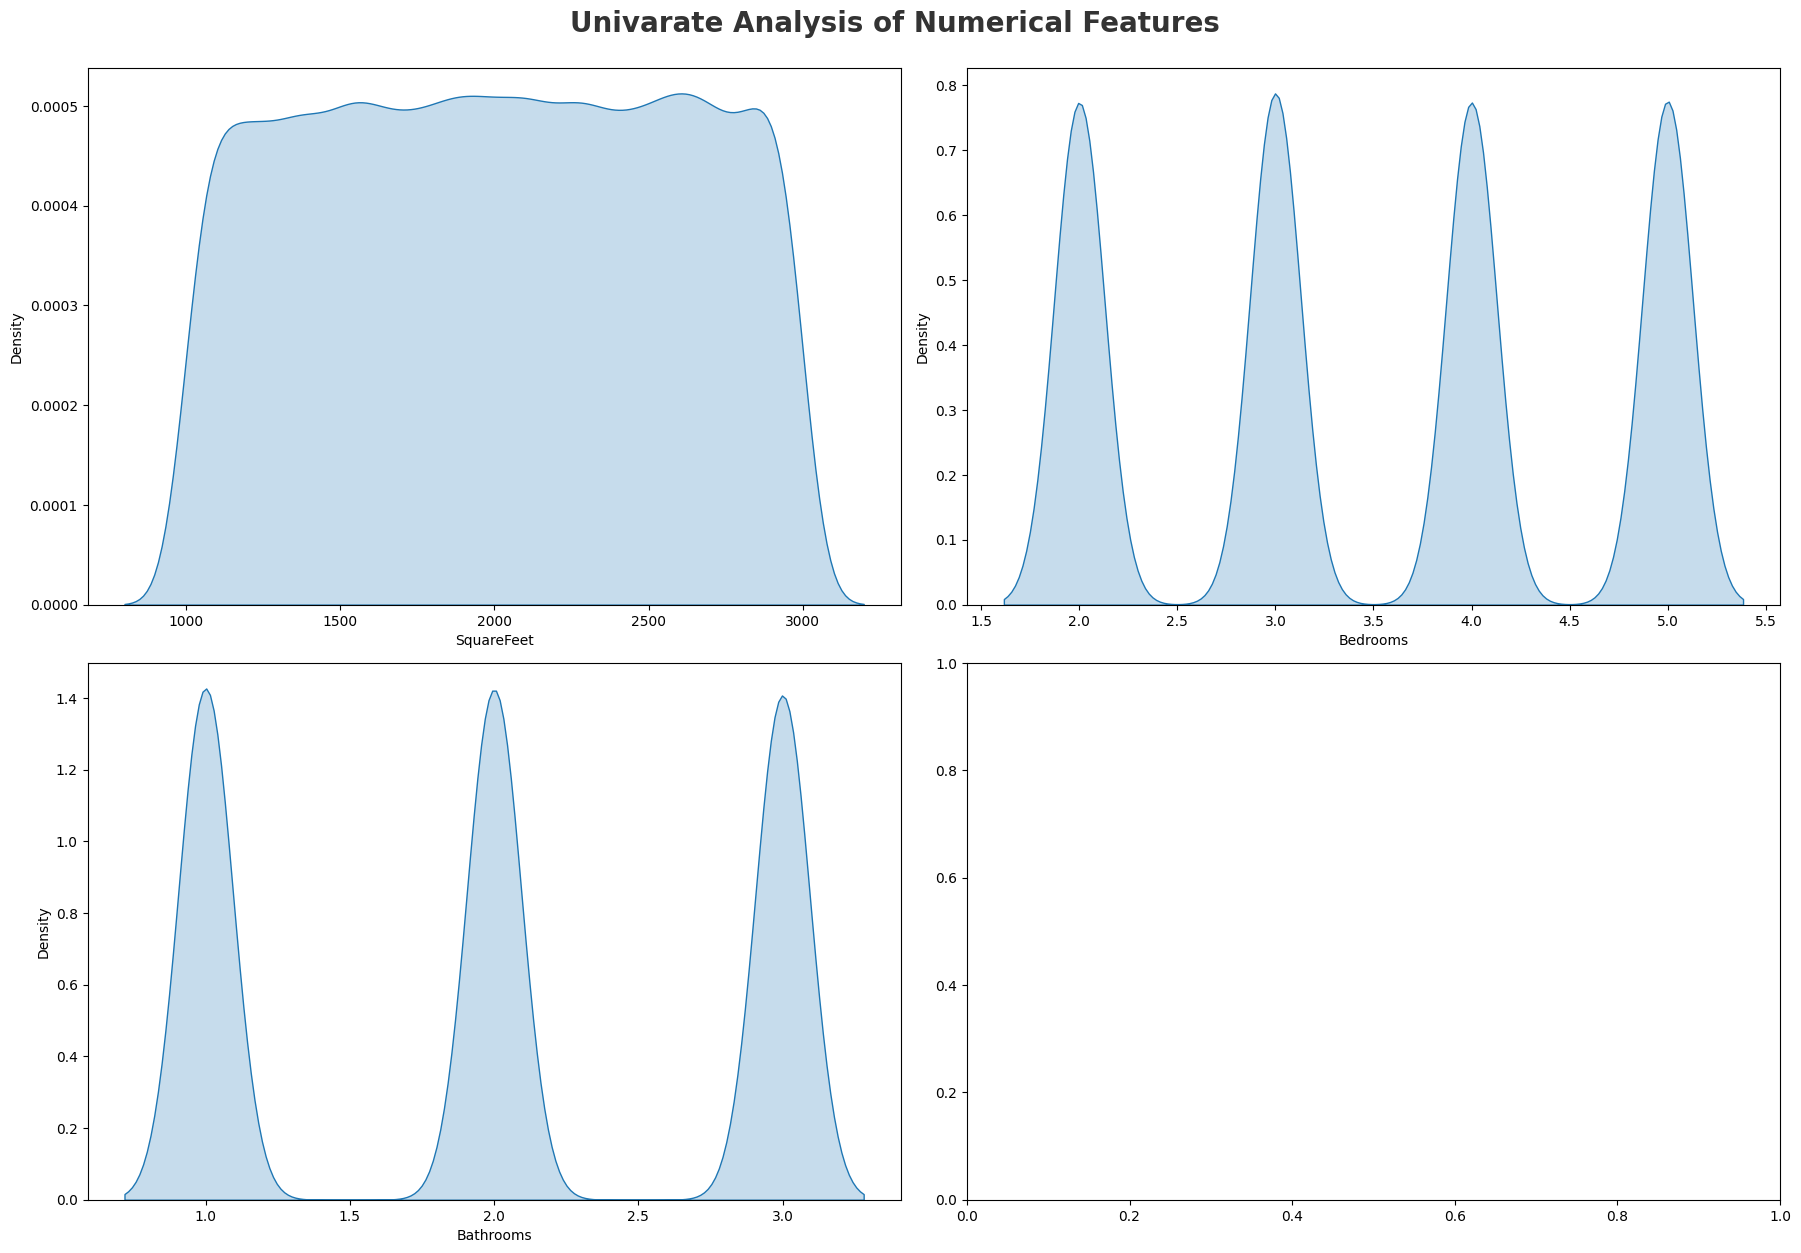

In [260]:
plt.figure(figsize=(18,18))
plt.suptitle('Univarate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], shade=True, data=df)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

<AxesSubplot: xlabel='Neighborhood', ylabel='count'>

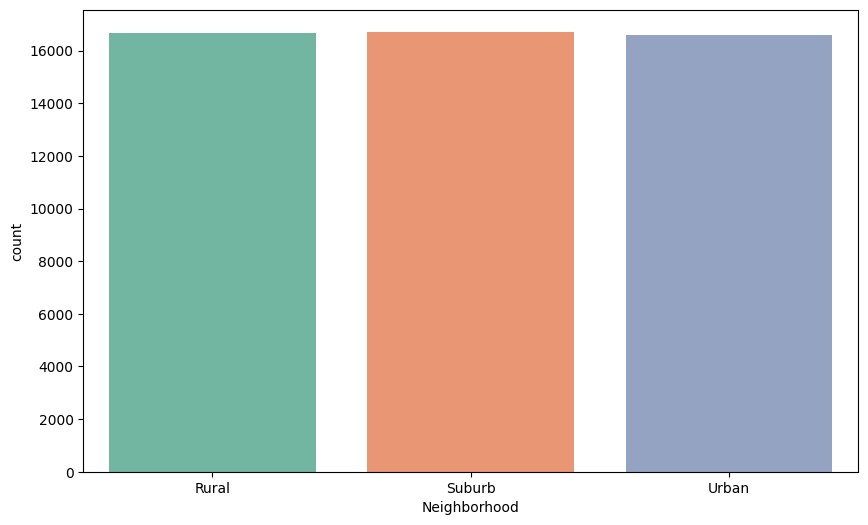

In [261]:
plt.figure(figsize=(10,6))
sns.countplot(x= 'Neighborhood', palette= 'Set2', data=df)

<AxesSubplot: >

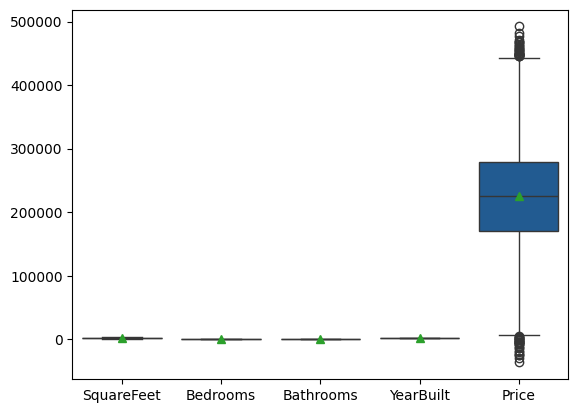

In [262]:
sns.boxplot(df, palette= 'Blues', showmeans = True)

<AxesSubplot: xlabel='SquareFeet', ylabel='Price'>

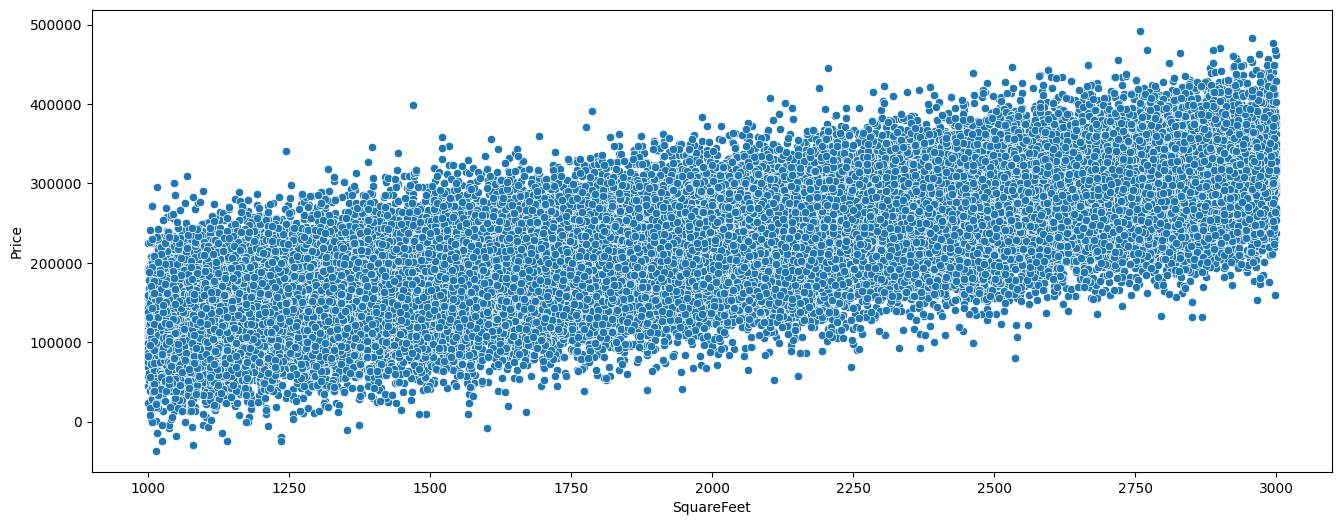

In [263]:
plt.figure(figsize =(16,6))
sns.scatterplot(data=df, x="SquareFeet", y="Price", palette="Set2")

Text(0.5, 1.0, 'Relationship Between SquareFeet and Price')

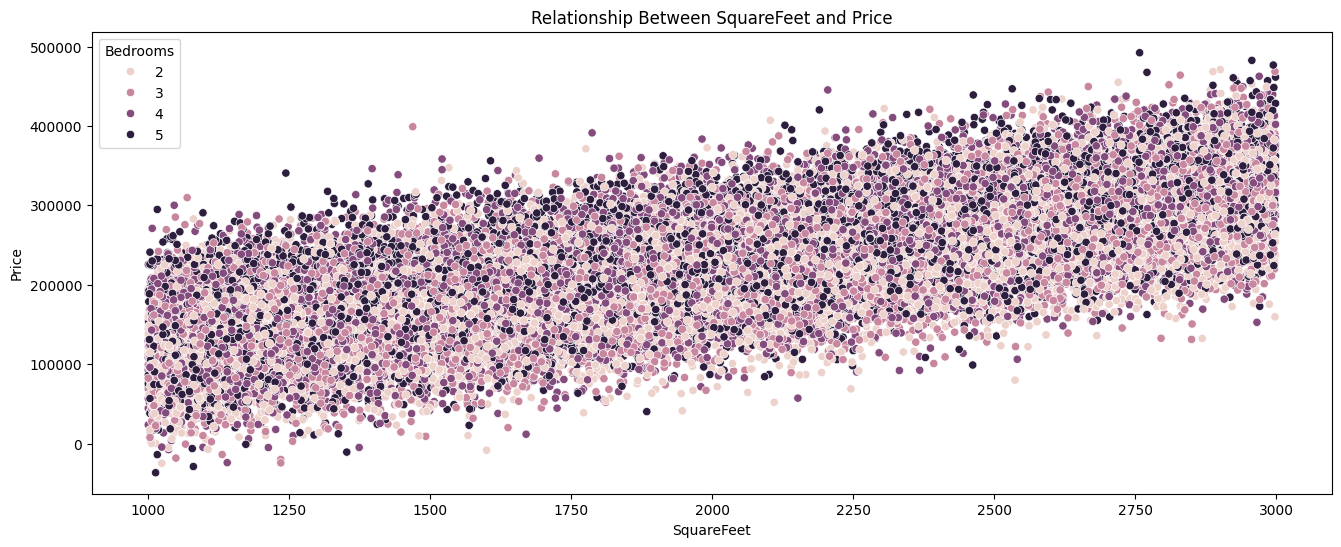

In [264]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df, x="SquareFeet", y="Price", hue="Bedrooms")
plt.title("Relationship Between SquareFeet and Price")

<AxesSubplot: xlabel='SquareFeet', ylabel='Price'>

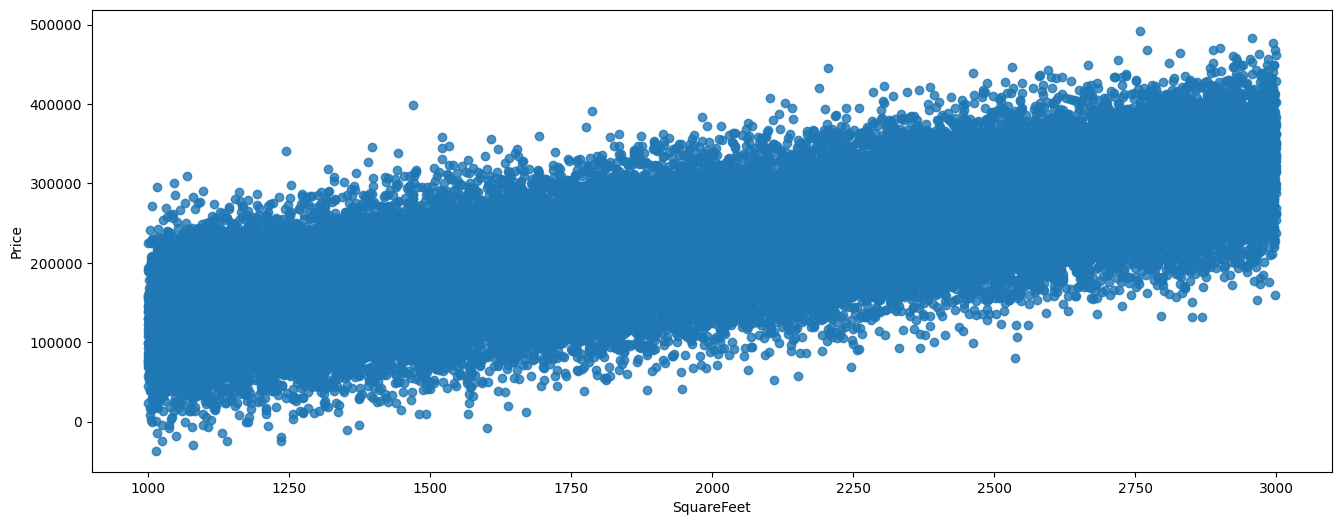

In [265]:
plt.figure(figsize=(16,6))
sns.regplot(data=df, x="SquareFeet", y="Price")

In [266]:
df['Age of House']=2023-df['YearBuilt']
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Age of House
0,2126,4,1,Rural,1969,215355.283618,54
1,2459,3,2,Rural,1980,195014.221626,43
2,1860,2,1,Suburb,1970,306891.012076,53
3,2294,2,1,Urban,1996,206786.787153,27
4,2130,5,2,Suburb,2001,272436.239065,22


Text(0.5, 1.0, 'Relationship Between Age of House and Price')

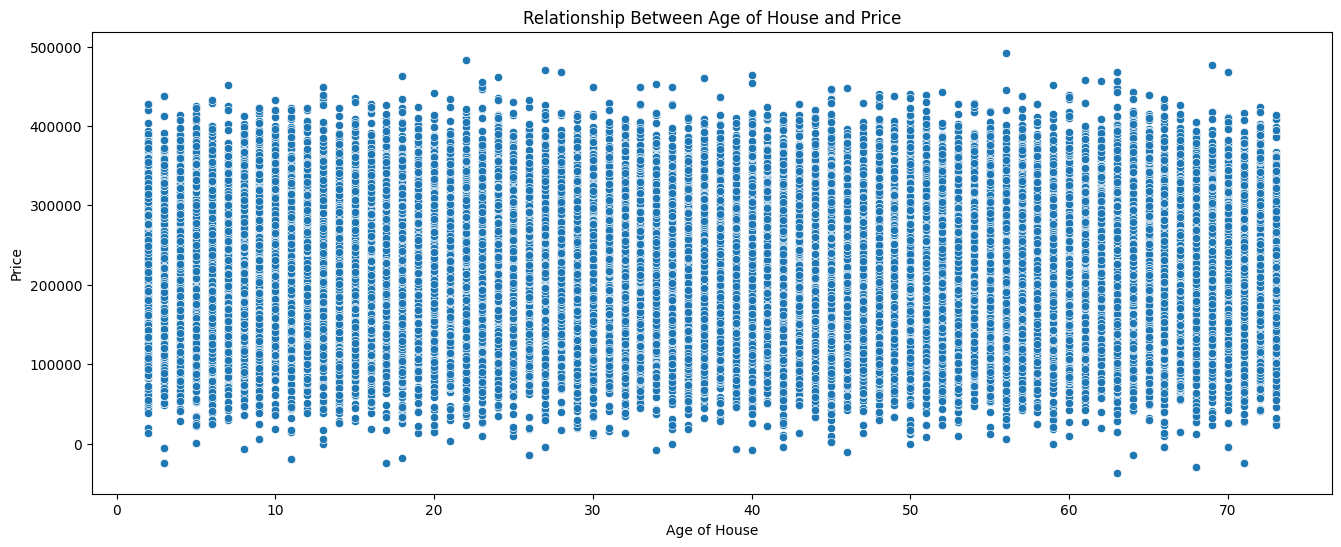

In [267]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=df, x="Age of House", y="Price")
plt.title("Relationship Between Age of House and Price")

<AxesSubplot: xlabel='Age of House', ylabel='Density'>

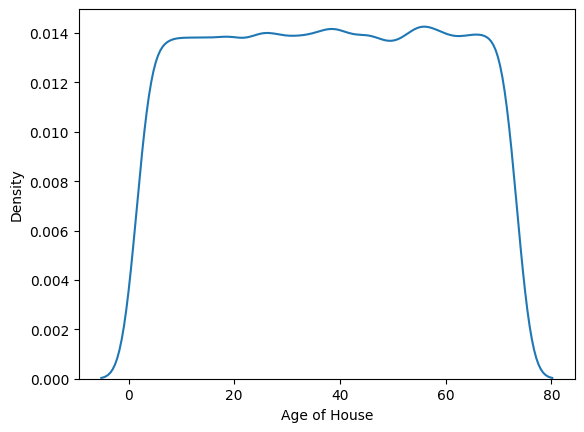

In [268]:
sns.kdeplot(df['Age of House'])

In [269]:
Q1 =np.percentile(df['Price'], 25)
Q3 =np.percentile(df['Price'], 75)
IQR=Q3-Q1

In [270]:
print(Q1)
print(Q3)
print(IQR)

169955.8602251014
279373.6300523317
109417.76982723031


In [271]:
upper = np.where(df['Price']>=( Q3+1.5*IQR))
lower = np.where(df['Price']<=( Q3-1.5*IQR))

In [272]:
print(upper)
print(lower)

(array([ 2845,  3285,  3357,  3784,  3967,  7276,  7430,  8687, 11322,
       11330, 12055, 16821, 21815, 23600, 25017, 26930, 26973, 29044,
       30955, 32168, 35166, 36661, 37192, 40168, 40614, 43745, 44311,
       46610, 47816, 49924], dtype=int64),)
(array([    9,    27,    30, ..., 49964, 49968, 49995], dtype=int64),)


In [273]:
df.reset_index()

,index,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,Age of House
0,0,2126,4,1,Rural,1969,215355.283618,54
1,1,2459,3,2,Rural,1980,195014.221626,43
2,2,1860,2,1,Suburb,1970,306891.012076,53
3,3,2294,2,1,Urban,1996,206786.787153,27
4,4,2130,5,2,Suburb,2001,272436.239065,22
...,...,...,...,...,...,...,...,...
49995,49995,1282,5,3,Rural,1975,100080.865895,48
49996,49996,2854,2,2,Suburb,1988,374507.656727,35
49997,49997,2979,5,3,Suburb,1962,384110.555590,61
49998,49998,2596,5,2,Rural,1984,380512.685957,39


In [274]:
df=pd.get_dummies(df,"Neighborhood",dtype=int,drop_first=True)
df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Age of House,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,54,0,0
1,2459,3,2,1980,195014.221626,43,0,0
2,1860,2,1,1970,306891.012076,53,1,0
3,2294,2,1,1996,206786.787153,27,0,1
4,2130,5,2,2001,272436.239065,22,1,0


<AxesSubplot: >

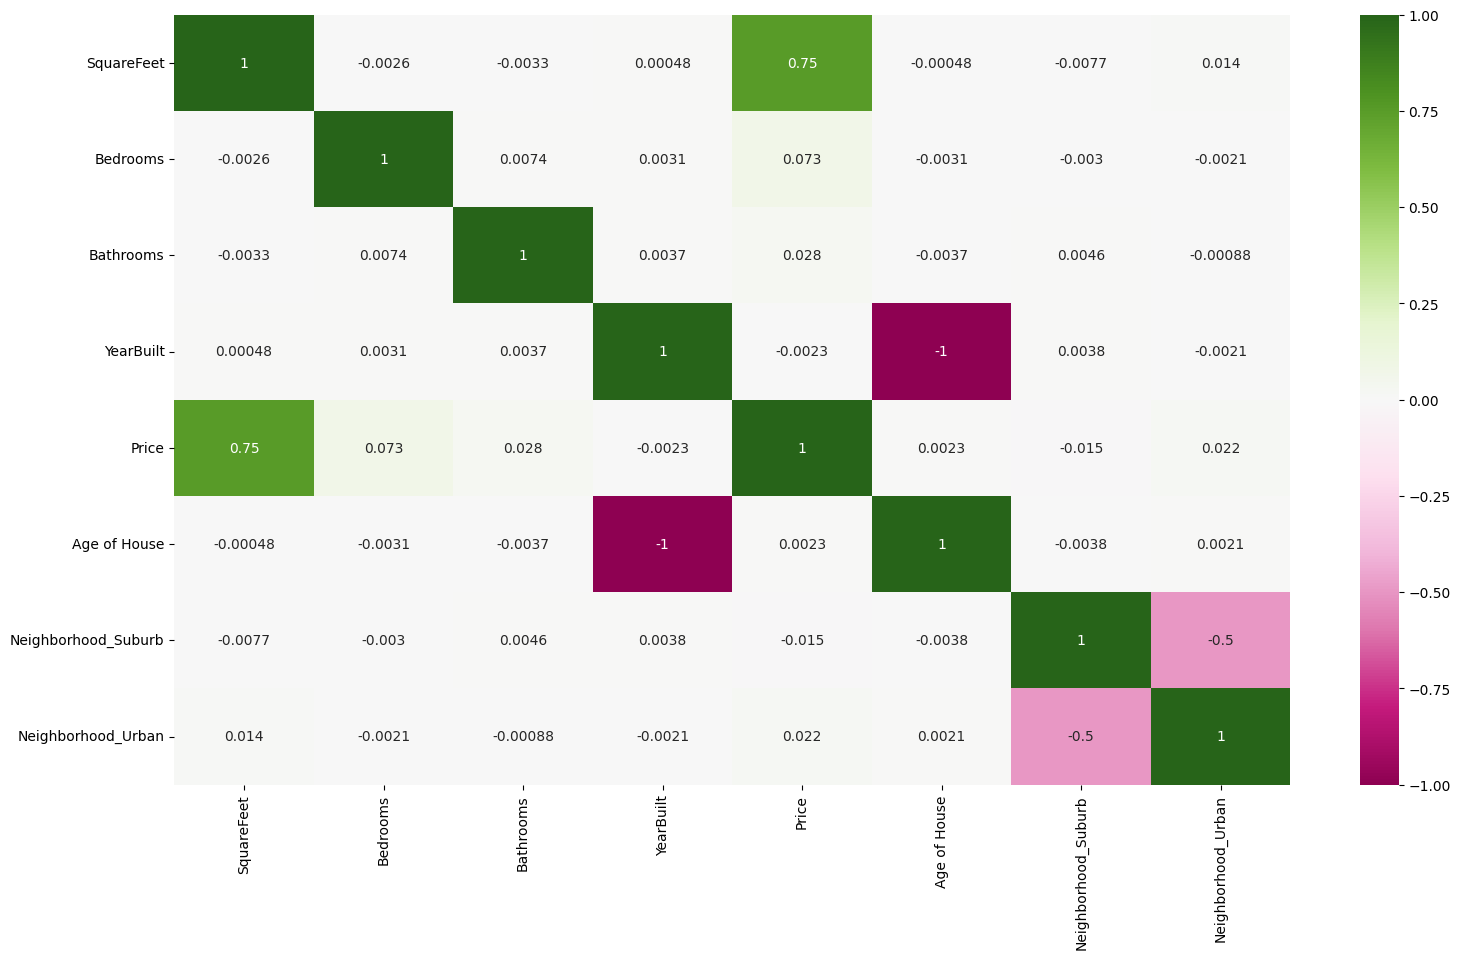

In [275]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True,cmap="PiYG")

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [277]:
X=df.drop(['YearBuilt','Price'], axis=1)
y=df['Price']
X

,SquareFeet,Bedrooms,Bathrooms,Age of House,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,54,0,0
1,2459,3,2,43,0,0
2,1860,2,1,53,1,0
3,2294,2,1,27,0,1
4,2130,5,2,22,1,0
...,...,...,...,...,...,...
49995,1282,5,3,48,0,0
49996,2854,2,2,35,1,0
49997,2979,5,3,61,1,0
49998,2596,5,2,39,0,0


In [278]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)


In [279]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35000, 6)
(15000, 6)
(35000,)
(15000,)


In [280]:
sc = StandardScaler()

In [281]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [282]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from plotly.offline import init_notebook_mode
init_notebook_mode (connected=True)
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import VotingRegressor


In [283]:
model_list = [LinearRegression(), Ridge(), Lasso(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor()]
model_list1 = []
R2_score = []
mae = []
mape = []
mse = []

In [284]:
for model in model_list:
    model_list1.append(str(model)[0:-2])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    R2_score.append(round(r2_score(y_test, y_pred) , 2))
    mae.append(round(mean_absolute_error(y_test, y_pred) ,2))
    mape.append(round(mean_absolute_percentage_error(y_test, y_pred) ,2))
    mse.append(round(mean_squared_error(y_test, y_pred), 2))

In [285]:
len(mae)

8

In [286]:
dict = {'model':model_list1, 'R2_score':R2_score,'MAPE':mape, 'MAE':mae,  'MSE':mse}
model_df = pd.DataFrame(dict).sort_values(ascending = False, by = 'R2_score')

In [287]:
model_df

,model,R2_score,MAPE,MAE,MSE
0,LinearRegression,0.57,0.25,39737.93,2.467994e+09
1,Ridge,0.57,0.25,39737.91,2.467993e+09
2,Lasso,0.57,0.25,39737.91,2.467992e+09
6,GradientBoostingRegressor,0.57,0.25,39813.64,2.478320e+09
7,AdaBoostRegressor,0.57,0.26,39912.79,2.496925e+09
5,RandomForestRegressor,0.51,0.27,42296.68,2.808366e+09
3,KNeighborsRegressor,0.48,0.27,43638.33,2.983534e+09
4,DecisionTreeRegressor,0.08,0.35,58369.45,5.294710e+09


In [288]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
model_lr = LinearRegression()
kfold_validation=KFold(5)

In [289]:
from sklearn.model_selection import cross_val_score
X_sc=sc.fit_transform(X)
X_poly = poly_reg.fit_transform(X_sc)
poly_reg.fit(X_poly, y)
results = cross_val_score(model_lr, X_poly, y, cv=kfold_validation)
print(results)
print(np.mean(results))

[0.55602842 0.57082552 0.57215626 0.56563217 0.57101121]
0.5671307171106508


In [290]:
import xgboost as xgb

In [291]:
regressor_xgb =xgb.XGBRegressor(eval_metric='rmsle')

In [292]:
from sklearn.model_selection import GridSearchCV
#set up search grid

param_grid = {"max_depth": [4,5,6],
              "n_estimators": [500,600,700],
              "learning_rate": [0.01,0.015]
}
#try out every combination of the above values
search = GridSearchCV(regressor_xgb, param_grid, cv=5).fit(X_train, y_train)

print("The best hyperparameters are", search.best_params_)

The best hyperparameters are {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


In [315]:
best_regresssor_xgb = xgb.XGBRegressor(learning_rate= search.best_params_["learning_rate"],
                                   n_estimators = search.best_params_["n_estimators"],
                                   max_depth = search.best_params_["max_depth"],
                                   eval_metric ="rmsle")
best_regresssor_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmsle', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [333]:
predictions_xgb = best_regresssor_xgb.predict(X_test)


In [342]:
from sklearn.metrics import mean_squared_log_error
RMSLE = mean_squared_error(y_test,predictions_xgb)
print("The score is %.5f" %RMSLE)
print(r2_score(y_test,predictions_xgb))
print(mean_squared_error(y_test,predictions_xgb))
print(mean_absolute_error(y_test, predictions_xgb))

The score is 2475244826.94651
0.5717235492071189
2475244826.9465103
39778.903849144954


In [343]:
np.isnan(y_test)

33553    False
9427     False
199      False
12447    False
39489    False
         ...  
15168    False
49241    False
39317    False
42191    False
15109    False
Name: Price, Length: 15000, dtype: bool

In [358]:
import lightgbm as lgb
from lightgbm.callback import _EarlyStoppingCallback
early_stopping = _EarlyStoppingCallback(stopping_rounds= 1000)

In [359]:
hyper_params = {
    "task": "train",
    "boosting_type": "gdbt",
    "objective": "regression",
    "metric": ["11", "12"],
    "learning_rate": 0.005,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.7,
    "bagging_freq": 10,
    "verbose":0,
    "max_depth": 8,
    "num_leaves":128,
    "max_bin": 512,
    "num_iterations": 100000
}

In [360]:
gbm = lgb.LGBMRegressor(**hyper_params)

In [362]:
gbm.fit(X_train, y_train,
        eval_set = [(X_test,y_test)],
        eval_metric="I1",
        callbacks=[early_stopping])
        

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


LightGBMError: Unknown boosting type gdbt

In [364]:
lgm_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

NotFittedError: No best_iteration found. Need to call fit with early_stopping callback beforehand.

In [ ]:
print("The rmse of prediction is", round(mean_squared_log_error(lgm_pred,y_test) **0.5, 5))

NameError: name 'lgm_pred' is not defined